# Zero Vibration (ZV) Shaper Zeros check via QPmR

We consider the shaper of a form

$$
S(s) = A + (1-A)e^{-sT}
$$
with $A$ and $T$ parameters free for placing the zero.

In [1]:
# imports, matplotlib setup and logging setup
import logging

import matplotlib.pyplot as plt
import numpy as np

from qpmr import qpmr, init_logger
from qpmr.plot import qpmr_basic, roots_basic

logger = init_logger(level="DEBUG") # do not run this multiple times

In [2]:
# Obtain parameters of ZV shaper by placing zero
s0 = -2.3833 +23.7554j # zero to place
beta, omega = np.abs(np.real(s0)), np.abs(np.imag(s0))
T = np.pi / omega
A = np.exp(np.pi*beta/omega) / (1 + np.exp(np.pi*beta/omega))

In [3]:
# obtain zeros via QPmR
delays = np.array([0, T], dtype=np.float64)
coefs = np.array([[A], [1-A]])
region = [-10, 3, 0, 500]
roots, meta = qpmr(region, coefs, delays, numerical_method="newton", ds=1.0)
complex_grid = meta.complex_grid
value = meta.z_value

2025-01-27 16:43:27,569 - qpmr.qpmr_v2 - DEBUG - Estimated size of complex grid = 162240.0 bytes
2025-01-27 16:43:27,586 - qpmr.numerical_methods - DEBUG - Numerical Newton converged in 3/100 steps, last MAX(|res|) = 2.7840278460536996e-12
2025-01-27 16:43:27,586 - qpmr.argument_principle - DEBUG - Enlarging region from region=[-10, 3, 0, 500] to reg=[-10.1, 3.1, -0.1, 500.1]
2025-01-27 16:43:27,602 - qpmr.argument_principle - DEBUG - Using argument principle, contour integral = 11.009315124426962 | rounded to 11.0
2025-01-27 16:43:27,602 - qpmr.argument_principle - DEBUG - Enlarging region from region=[-9.9, 2.9, 0.1, 499.9] to reg=[-10.0, 3.0, 0.0, 500.0]
2025-01-27 16:43:27,610 - qpmr.argument_principle - DEBUG - Using argument principle, contour integral = 11.009427476669948 | rounded to 11.0


C:\Users\peichl\source\qpmr\src\qpmr\plot\basic_plot.py:89: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(re_grid, im_grid, np.real(meta.z_value), levels=[0],
C:\Users\peichl\source\qpmr\src\qpmr\plot\basic_plot.py:91: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(re_grid, im_grid, np.imag(meta.z_value), levels=[0],


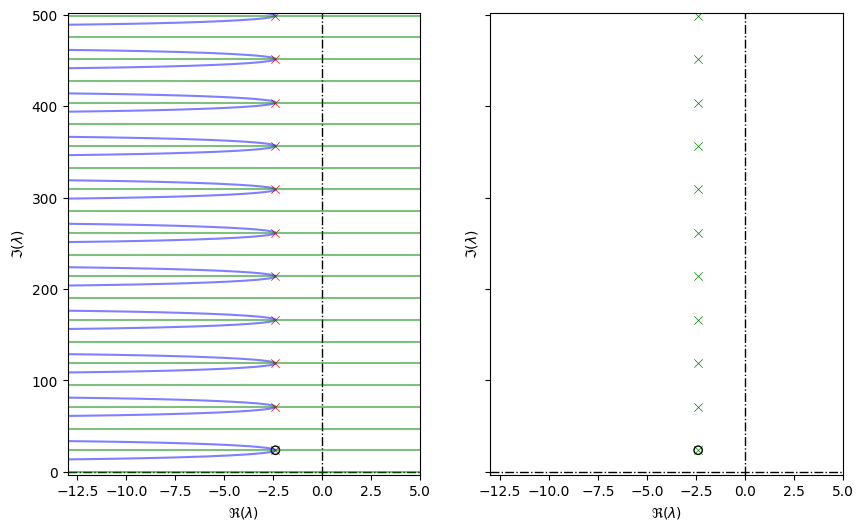

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6), sharex=True, sharey=True)

qpmr_basic(roots, meta, ax=ax1)
roots_basic(roots, ax=ax2)
ax1.scatter(np.real(s0), np.imag(s0), marker="o", edgecolors="k", facecolors='none')
ax2.scatter(np.real(s0), np.imag(s0), marker="o", edgecolors="k", facecolors='none')